In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#importing point data:

image_numbers = np.arange(0,4000,1)
u_max_sofar = 0
v_max_sofar = 0
x_max_sofar = 0
z_max_sofar = 0

for image_number_orig in image_numbers:
    point_data = np.loadtxt('/home/bay22/github_repos/RIMSAR/data/03_processed/point_data/point_data_'+str          (image_number_orig)+'.dat')
    #density of borosilicate glass: 2.23 g/cm3
    #volume of 0.6cm radius glass sphere = 0.90 cm^3
    #mass = 0.002 kg
    mass = 0.002
    point_data *= 12/(29.4*1000)
    point_data[:,1] = 0.4-point_data[:,1]
    point_data[:,3:] *= 300
    T = 4000/240 #total time of experimental run

    #finding max and mins
    x_max_data = np.amax(np.abs(point_data[:,0]))
    x_max_sofar = max(x_max_data,x_max_sofar)
    z_max_data = np.amax(np.abs(point_data[:,1]))
    z_max_sofar = max(z_max_data,z_max_sofar)
    u_max_data = np.amax(np.abs(point_data[:,3]))
    u_max_sofar = max(u_max_data,u_max_sofar)
    v_max_data = np.amax(np.abs(point_data[:,4]))
    v_max_sofar = max(v_max_data,v_max_sofar)
    
print(x_max_sofar)
print(z_max_sofar)

0.39612244897959187
0.2944897959183674


In [3]:
#generating data bins in x-y space

x_upper = 0.45
z_upper = 0.45
x_lower = 0.0
z_lower = 0.0

x_bin = np.arange(x_lower,x_upper,0.005)
z_bin = np.arange(z_lower,z_upper,0.005)

In [4]:
xN = x_bin.shape[0]
zN = z_bin.shape[0]

#building array of lists:
binned_particles_u = [[[0 for k in range(0)] for j in range(zN)] for i in range(xN)]
binned_particles_v = [[[0 for k in range(0)] for j in range(zN)] for i in range(xN)]

#print(binned_particles[:][zN-1][xN-1])
#binned_particles[:][0][0].append(5)
#print(binned_particles[:][0][0])

#building density field
num_particles = np.zeros((xN,zN)) # number of particles in each bin

#building field vector of means
velocity_mean_field = np.zeros((xN,zN,2)) 

#building field matrix of covariance matrices
velocity_covariance_field = np.zeros((xN,zN,2,2))


In [5]:
N = 0 #number of measurements

for image_number_orig in image_numbers:
    point_data = np.loadtxt('/home/bay22/github_repos/RIMSAR/data/03_processed/point_data/point_data_'+str          (image_number_orig)+'.dat')
    #density of borosilicate glass: 2.23 g/cm3
    #volume of 0.6cm radius glass sphere = 0.90 cm^3
    #mass = 0.002 kg
    mass = 0.002
    point_data *= 12/(29.4*1000)
    point_data[:,1] = 0.4-point_data[:,1]
    point_data[:,3:] *= 300

    n_data_points = point_data.shape[0] #number of data points within each frame
    #N += n_data_points
    for i in range(0,n_data_points):
        x_i = int(np.floor(xN*(point_data[i,0]-x_lower)/(x_upper - x_lower)))
        z_i = int(np.floor(zN*(point_data[i,1]-z_lower)/(z_upper - z_lower)))

        #if data is located in spatial bin:
        if (x_i >0) and (x_i < xN):
            if (z_i >0) and (z_i < zN):
                #binning data
                binned_particles_u[:][z_i][x_i].append(point_data[i,3])
                binned_particles_v[:][z_i][x_i].append(point_data[i,4])
                num_particles[x_i][z_i] += 1

                

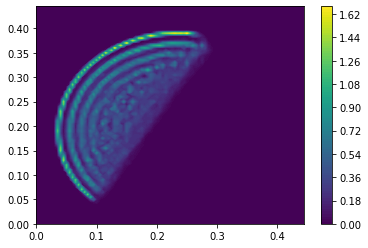

In [11]:

particle_density = num_particles*mass/T
plt.contourf(x_bin,z_bin,particle_density,levels=100)
plt.colorbar()


/home/bay22/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bay22/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


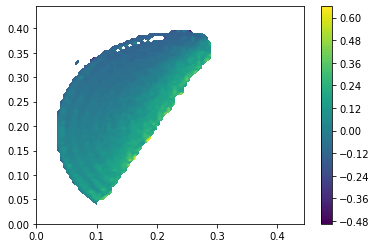

In [7]:
#calculating standard deviations and means
for i in range(0,xN):
    for j in range(0,zN):
        velocity_mean_field[i,j,0] = np.mean(binned_particles_u[:][j][i])
        velocity_mean_field[i,j,0] = np.mean(binned_particles_v[:][j][i])

plt.contourf(x_bin,z_bin,velocity_mean_field[:,:,0],levels=100)
plt.colorbar()

/home/bay22/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/bay22/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-8-985399bf2c83>:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  velocity_covariance_field[i,j,:,:] = np.cov(vel_matrix)
/home/bay22/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/bay22/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


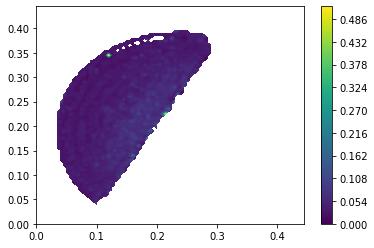

In [8]:
#calculating covariance matrices
for i in range(0,xN):
    for j in range(0,zN):
        #building velocity matrix for covarainces:
        vel_matrix = np.zeros((2,int(num_particles[i,j])))
        vel_matrix[0,:] = binned_particles_u[:][j][i]
        vel_matrix[1,:] = binned_particles_v[:][j][i]
        
        velocity_covariance_field[i,j,:,:] = np.cov(vel_matrix)

plt.contourf(x_bin,z_bin,velocity_covariance_field[:,:,0,0],levels=100)
plt.colorbar()


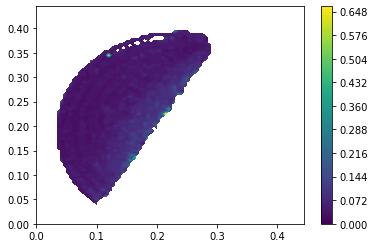

In [9]:
#calculating Reynolds-averaged variables:

uu_bar = velocity_covariance_field[:,:,0,0] + velocity_mean_field[:,:,0]**2
vv_bar = velocity_covariance_field[:,:,1,1] + velocity_mean_field[:,:,1]**2
uv_bar = velocity_covariance_field[:,:,0,1] + velocity_mean_field[:,:,1]*velocity_mean_field[:,:,0]
plt.contourf(x_bin,z_bin,uu_bar,levels=100)
plt.colorbar()

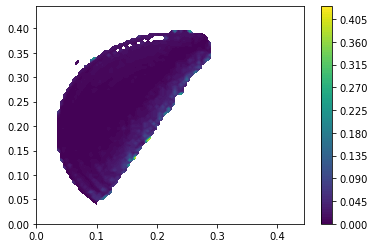

In [10]:
plt.contourf(x_bin,z_bin,velocity_mean_field[:,:,0]**2,levels=100)
plt.colorbar()